In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pysentani as sti
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
survey['access_type'] = sti.access_type(survey)

In [3]:
appliances = ['lighting','TV','radio','fridge','rice_cooker','fan']

In [4]:
now_columns = ['app_now/{}'.format(a) for a in appliances]
now_columns.append('access_type')
survey[now_columns].head()

,app_now/lighting,app_now/TV,app_now/radio,app_now/fridge,app_now/rice_cooker,app_now/fan,access_type
0,0,1,1,0,0,0,no_access
1,1,1,1,0,0,0,no_access
2,0,1,0,0,0,0,no_access
3,1,1,0,0,0,0,no_access
4,1,0,0,0,0,0,no_access


In [5]:
appliance_data = survey[now_columns]
appliance_mean = appliance_data.groupby('access_type').mean()
appliance_mean

,app_now/lighting,app_now/TV,app_now/radio,app_now/fridge,app_now/rice_cooker,app_now/fan
access_type,,,,,,
PLN_grid,0.931338,0.815141,0.301056,0.329225,0.276408,0.176056
PLN_microgrid,0.949367,0.810127,0.278481,0.037975,0.012658,0.025316
community_microgrid,0.865385,0.923077,0.500000,0.019231,0.134615,0.096154
no_access,0.883268,0.797665,0.431907,0.015564,0.031128,0.081712


In [6]:
appliance_mean['access_type'] = appliance_mean.index

In [7]:
melted = pd.melt(appliance_mean, 
                 id_vars=['access_type'],
                 value_vars=['app_now/lighting','app_now/TV','app_now/radio',
                             'app_now/fridge','app_now/rice_cooker','app_now/fan'],
                 value_name='Percent Ownership')

In [8]:
melted.rename(columns={'access_type': 'Access Type'},inplace = True)


melted.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                             'community_microgrid': 'Community Microgrid',
                                             'PLN_microgrid': 'PLN Microgrid',
                                             'no_access': 'No Access'}},inplace = True)

melted.replace(to_replace = {'variable': {'app_now/rice_cooker': 'Rice Cooker',
                                            'app_now/TV': 'TV',
                                            'app_now/fridge': 'Fridge',
                                            'app_now/fan':'Fan',
                                            'app_now/lighting': 'Lighting',
                                            'app_now/radio': 'Radio'}},inplace = True)

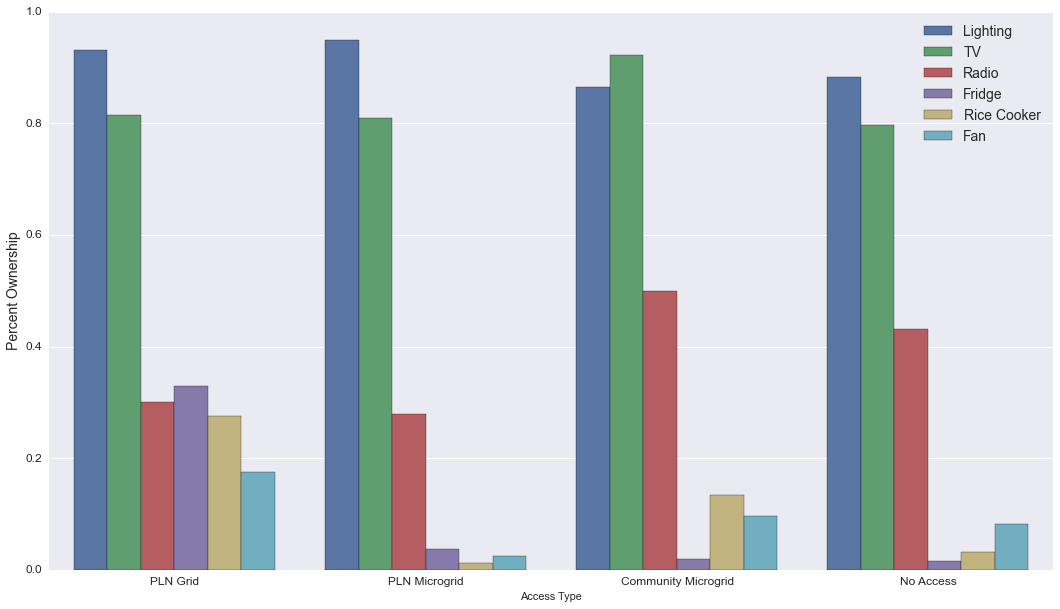

In [9]:
plt.figure(figsize=(18,10))
sns.barplot(x='Access Type', y='Percent Ownership', hue='variable', data=melted,
            order=['PLN Grid','PLN Microgrid','Community Microgrid','No Access'])
plt.ylabel('Percent Ownership', fontsize=14)
plt.legend(prop={'size':14})
plt.tick_params(labelsize=12)
plt.savefig('appliance-ownership-revised.pdf')